In [1]:
import pandas as pd

In [2]:
resign_df = pd.read_csv('./Data/resign.csv')
resign_df.head()

,satisfaction,evaluation,project,workhour,years,accident,resign,promotion,good
0,0.38,0.53,2,157,3,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1
2,0.11,0.88,7,272,4,0,1,0,1
3,0.72,0.87,5,223,5,0,1,0,1
4,0.37,0.52,2,159,3,0,1,0,0


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
resign_df_X = scaler.fit_transform(resign_df.iloc[:, [0, 1, 2, 3, 4, 5, 7]])
resign_df_Y = resign_df['resign']

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(\
    resign_df_X, resign_df_Y, test_size=0.2, random_state=0)

In [7]:
import tensorflow as tf
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense( units=3, input_dim=7, activation='relu'))
model.add(tf.keras.layers.Dense( units=1, activation='sigmoid'))

2022-09-30 13:34:57.748407: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-30 13:34:57.749299: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


위에서 보면, add한것이 Hidden 이므로, 7개의 히든이 존재하며, 이게 3개에 연결되어있는 것

In [9]:
model.compile( optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
result = model.fit(x_train, y_train, validation_split=0.2, epochs=40, verbose=1)

2022-09-30 13:35:57.037004: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-30 13:35:57.159174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/40
300/300 [==============================] - 3s 5ms/step - loss: 0.7057 - accuracy: 0.6053 - val_loss: 0.5580 - val_accuracy: 0.7404
Epoch 2/40
  1/300 [..............................] - ETA: 1s - loss: 0.5191 - accuracy: 0.8125

2022-09-30 13:35:59.484037: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


300/300 [==============================] - 1s 5ms/step - loss: 0.5243 - accuracy: 0.7559 - val_loss: 0.4954 - val_accuracy: 0.7708
Epoch 3/40
300/300 [==============================] - 1s 5ms/step - loss: 0.4753 - accuracy: 0.7881 - val_loss: 0.4507 - val_accuracy: 0.8029
Epoch 4/40
300/300 [==============================] - 1s 5ms/step - loss: 0.4317 - accuracy: 0.8045 - val_loss: 0.4077 - val_accuracy: 0.8096
Epoch 5/40
300/300 [==============================] - 1s 5ms/step - loss: 0.3913 - accuracy: 0.8279 - val_loss: 0.3689 - val_accuracy: 0.8713
Epoch 6/40
300/300 [==============================] - 1s 5ms/step - loss: 0.3567 - accuracy: 0.8896 - val_loss: 0.3364 - val_accuracy: 0.9096
Epoch 7/40
300/300 [==============================] - 1s 5ms/step - loss: 0.3284 - accuracy: 0.9093 - val_loss: 0.3101 - val_accuracy: 0.9183
Epoch 8/40
300/300 [==============================] - 1s 4ms/step - loss: 0.3055 - accuracy: 0.9113 - val_loss: 0.2888 - val_accuracy: 0.9200
Epoch 9/40
300/30

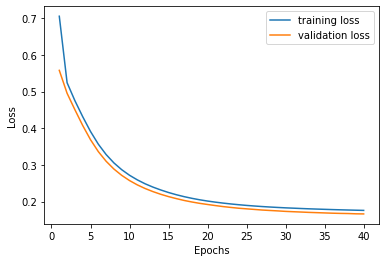

In [12]:
import matplotlib.pyplot as plt
import numpy as np

epochs = np.arange(1, 40+1)
plt.plot(epochs, result.history['loss'], label='training loss')
plt.plot(epochs, result.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

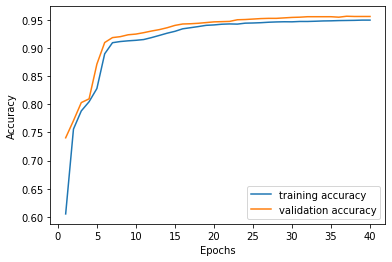

In [13]:
epochs = np.arange(1, 40+1)
plt.plot(epochs, result.history['accuracy'], label='training accuracy')
plt.plot(epochs, result.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
model.evaluate(x_test, y_test)

94/94 [==============================] - 0s 3ms/step - loss: 0.1677 - accuracy: 0.9510


[0.16767433285713196, 0.9509999752044678]

In [16]:
x_test[0, ]

array([-0.69516483, -0.85358047, -1.46286291, -1.20241514, -0.34123516,
       -0.41116529, -0.14741182])

In [17]:
x_new = [[-0.7, -0.9, -1.3, -0.9, -0.3, 0.4, -0.02]]
y_pred = model.predict(x_new)
y_pred

2022-09-30 13:40:34.436430: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[0.61399996]], dtype=float32)